### K-Prototypes Clustering

Joshua Rosell

K-Prototypes Clustering combines K-Means (suited for numerical variables) and K-Modes (suited for categorical variables). Since the dataset consists of both categorical and numerical features, this approach is just appropriate.

### Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [26]:
dataset = pd.read_csv('student-mat.csv', sep=';')

In [27]:
# Extract features (columns 0 to 29)
X = dataset.iloc[:, 0:30].values

# Print shape to verify
print(f"Features shape: {X.shape}")

Features shape: (395, 30)


Clusters: 1, Cost: 32113.241202688743
Clusters: 2, Cost: 18058.32274797354
Clusters: 3, Cost: 11567.617740729549
Clusters: 4, Cost: 9540.68183506957
Clusters: 5, Cost: 8731.715852684578
Clusters: 6, Cost: 8252.016610374432
Clusters: 7, Cost: 7893.040499284498
Clusters: 8, Cost: 7669.300887787405
Clusters: 9, Cost: 7259.5288274716395
Clusters: 10, Cost: 7242.399789782879


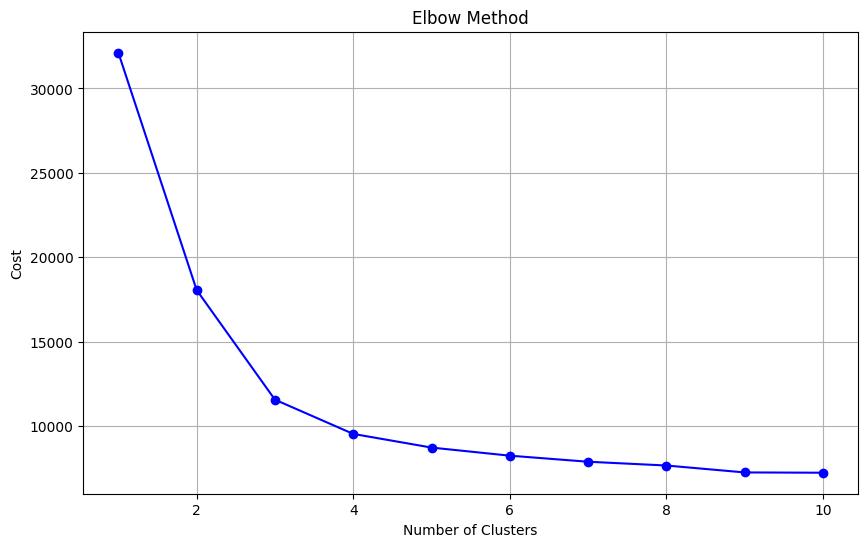

In [28]:
from kmodes.kprototypes import KPrototypes

# Import the necessary library for k-prototypes

# Identify which columns in X are categorical
# Based on the dataset info, these are the categorical features indices
categorical_indices = [0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22]

# Implement elbow method for k-prototypes
cost_list = []
K = range(1, 11)

for num_clusters in K:
    kprototype = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42)
    kprototype.fit_predict(X, categorical=categorical_indices)
    cost_list.append(kprototype.cost_)
    print(f'Clusters: {num_clusters}, Cost: {kprototype.cost_}')

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, cost_list, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

### Implementing the Elbow Method for K-Prototypes Clustering

This code implements the elbow method to determine the optimal number of clusters for student performance data using the K-Prototypes algorithm:

### Setting Up Mixed Data Clustering



In [29]:
# from kmodes.kprototypes import KPrototypes



The code begins by importing [`KPrototypes`], a specialized clustering algorithm designed to handle datasets with mixed data types (both numerical and categorical variables).



In [30]:
# categorical_indices = [0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22]



This line identifies which columns in the student dataset contain categorical data (like gender, study habits, parental education) versus numerical data (like grades, study hours). This distinction is crucial because K-Prototypes applies different distance metrics to different variable types.

### Implementing the Elbow Method



In [31]:
# cost_list = []
# K = range(1, 11)



The elbow method is initialized by creating a list to store clustering costs and defining a range of potential cluster counts (1-10) to evaluate.



In [32]:
# for num_clusters in K:
#     kprototype = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42)
#     kprototype.fit_predict(X, categorical=categorical_indices)
#     cost_list.append(kprototype.cost_)
#     print(f'Clusters: {num_clusters}, Cost: {kprototype.cost_}')



The for loop systematically:
1. Creates a K-Prototypes model with each candidate number of clusters
2. Fits the model to the student data
3. Records the clustering cost (similar to inertia/within-cluster sum of squares)
4. Prints each iteration's results for monitoring

This analysis will produce a cost curve that typically shows diminishing returns as clusters increase. The "elbow point" where the cost reduction starts to level off indicates the optimal number of clusters - representing the best balance between model complexity and explanatory power for segmenting the student population.

In [33]:
# Perform final clustering with the optimal cluster number
# Based on the elbow curve, the optimal number of clusters is 4
kprototype = KPrototypes(n_clusters=4, init='Huang', random_state=42)
clusters = kprototype.fit_predict(X, categorical=categorical_indices)

# Add cluster labels to the dataset
dataset['Cluster'] = clusters

# Print cluster sizes
print("Cluster sizes:")
print(pd.Series(clusters).value_counts().sort_index())

Cluster sizes:
0      5
1    244
2    100
3     46
Name: count, dtype: int64


### Finalizing K-Prototypes Clustering with Optimal Parameters

This code implements the final K-Prototypes clustering solution after determining the optimal number of clusters through elbow method analysis:

### Applying Optimal Clustering Configuration



In [34]:
# kprototype = KPrototypes(n_clusters=4, init='Huang', random_state=42)
# clusters = kprototype.fit_predict(X, categorical=categorical_indices)



Based on prior elbow curve analysis, four clusters was determined to be the optimal number for segmenting the student performance data. The code creates a K-Prototypes model with this optimal configuration, using the Huang initialization method which selects initial centroids based on density patterns in the data.

The [`fit_predict()`]method efficiently combines two operations:
1. Training the model on the feature data [`X`]
2. Assigning each student to one of the four identified clusters

The [`categorical_indices`] parameter ensures that categorical student attributes (like gender, study methods) use matching dissimilarity metrics while numerical attributes (like grades, hours studied) use Euclidean distance metrics.

### Integrating Results with Source Data



In [35]:
# dataset['Cluster'] = clusters



This final step adds the cluster assignments as a new column in the original student dataset. Each student record is now enriched with its cluster label (0, 1, 2, or 3), enabling:
- Profiling of different student segments
- Targeted educational interventions based on cluster characteristics
- Visualization of student groupings
- Analysis of factors that differentiate successful vs. struggling students

This combination of mixed-type clustering and data integration creates a powerful foundation for evidence-based educational decision-making.

Clusters: 2, Silhouette Score: 0.0777
Clusters: 3, Silhouette Score: 0.0467
Clusters: 4, Silhouette Score: 0.0194
Clusters: 5, Silhouette Score: 0.0074
Clusters: 6, Silhouette Score: -0.0029
Clusters: 7, Silhouette Score: 0.0083
Clusters: 8, Silhouette Score: 0.0034
Clusters: 9, Silhouette Score: -0.0021
Clusters: 10, Silhouette Score: 0.0003


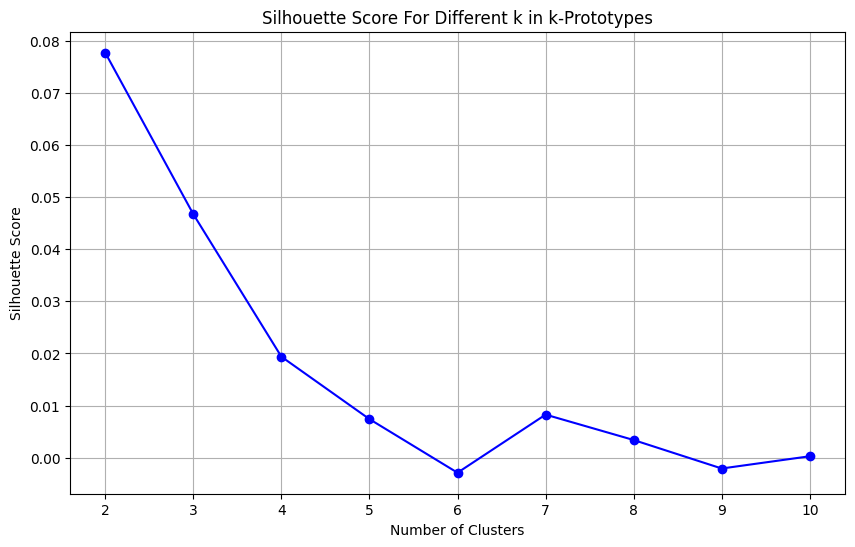

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

import matplotlib.pyplot as plt

# Preprocess data for silhouette calculation
# Identify numerical indices
numerical_indices = [i for i in range(X.shape[1]) if i not in categorical_indices]

# Process numerical features
X_num = X[:, numerical_indices].astype(float)
X_num_scaled = StandardScaler().fit_transform(X_num)

# Process categorical features
X_cat = X[:, categorical_indices]
X_cat = np.array([[str(val) for val in row] for row in X_cat])
X_cat_enc = OneHotEncoder(sparse_output=False).fit_transform(X_cat)
# X_cat_enc = OneHotEncoder(sparse=False).fit_transform(X_cat)

# Combine both features
X_processed = np.hstack((X_num_scaled, X_cat_enc))

# Calculate silhouette scores for different k values
silhouette_scores = []
K_range = range(2, 11)  # Silhouette score requires at least 2 clusters

for k in K_range:
    if k == 4:  # We already have the clusters for k=4
        score = silhouette_score(X_processed, clusters)
    else:
        kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        cluster_labels = kproto.fit_predict(X, categorical=categorical_indices)
        score = silhouette_score(X_processed, cluster_labels)
    
    silhouette_scores.append(score)
    print(f'Clusters: {k}, Silhouette Score: {score:.4f}')

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Different k in k-Prototypes')
plt.grid(True)
plt.show()

### Evaluating Clustering Quality with Silhouette Analysis

This code performs silhouette analysis on K-Prototypes clustering results to validate the optimal number of clusters for student performance data:

### Preprocessing Mixed Data for Silhouette Calculation



In [37]:
# numerical_indices = [i for i in range(X.shape[1]) if i not in categorical_indices]
# X_num = X[:, numerical_indices].astype(float)
# X_num_scaled = StandardScaler().fit_transform(X_num)



The code first identifies which features are numerical (by finding indices not in the categorical list) and processes them by converting to float and standardizing with zero mean and unit variance, which is crucial for distance-based metrics.



In [38]:
# X_cat = X[:, categorical_indices]
# X_cat = np.array([[str(val) for val in row] for row in X_cat])
# X_cat_enc = OneHotEncoder(sparse_output=False).fit_transform(X_cat)



Categorical variables are converted to strings and then transformed using one-hot encoding, which creates binary columns for each category value, making them suitable for Euclidean distance calculations.



In [39]:
# X_processed = np.hstack((X_num_scaled, X_cat_enc))



The numerical and categorical processed data are horizontally stacked to create a unified dataset that can be used with the silhouette score function.

### Computing Silhouette Scores Across Cluster Counts



In [40]:
# silhouette_scores = []
# K_range = range(2, 11)  # Silhouette score requires at least 2 clusters



The code prepares to evaluate clustering quality across different cluster counts, starting from 2 (the minimum required for silhouette analysis) to 10.



In [41]:
# for k in K_range:
#     if k == 4:  # We already have the clusters for k=4
#         score = silhouette_score(X_processed, clusters)
#     else:
#         kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
#         cluster_labels = kproto.fit_predict(X, categorical=categorical_indices)
#         score = silhouette_score(X_processed, cluster_labels)
    
#     silhouette_scores.append(score)
#     print(f'Clusters: {k}, Silhouette Score: {score:.4f}')



For each potential cluster count, the code:
1. Uses the previously computed cluster assignments when k=4 (optimizing computation)
2. Generates new cluster assignments for other k values
3. Calculates the silhouette score, which measures how well-separated the clusters are
4. Higher silhouette scores indicate better-defined clusters with greater separation

This comprehensive validation approach ensures that the selected number of clusters (4) is justified not only by the elbow method but also by how well the resulting clusters are separated.

## EDA

In [42]:
# Summary statistics for numerical features
numerical_features = ['age', 'G1', 'G2', 'absences', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numerical_stats = dataset.groupby('Cluster')[numerical_features].mean()

print("Numerical Features Summary:")
print(numerical_stats)

# Proportion of categorical values per cluster
categorical_features = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'higher', 'internet', 'romantic']
categorical_stats = dataset.groupby('Cluster')[categorical_features].apply(lambda x: x.mode())

print("\nCategorical Features Summary (Mode):")
print(categorical_stats)


Numerical Features Summary:
               age         G1         G2   absences    famrel  freetime  \
Cluster                                                                   
0        17.800000  10.200000  10.000000  52.600000  4.200000  2.200000   
1        16.569672  10.950820  10.750000   1.512295  4.000000  3.217213   
2        16.680000  11.060000  11.050000   8.100000  3.900000  3.300000   
3        17.282609  10.434783   9.869565  17.673913  3.717391  3.304348   

            goout      Dalc      Walc    health  
Cluster                                          
0        2.600000  1.400000  2.000000  3.600000  
1        3.016393  1.364754  2.127049  3.594262  
2        3.180000  1.600000  2.400000  3.520000  
3        3.500000  1.847826  2.956522  3.413043  

Categorical Features Summary (Mode):
          sex address famsize Pstatus      Mjob      Fjob higher internet  \
Cluster                                                                     
0       0   F       U     GT3

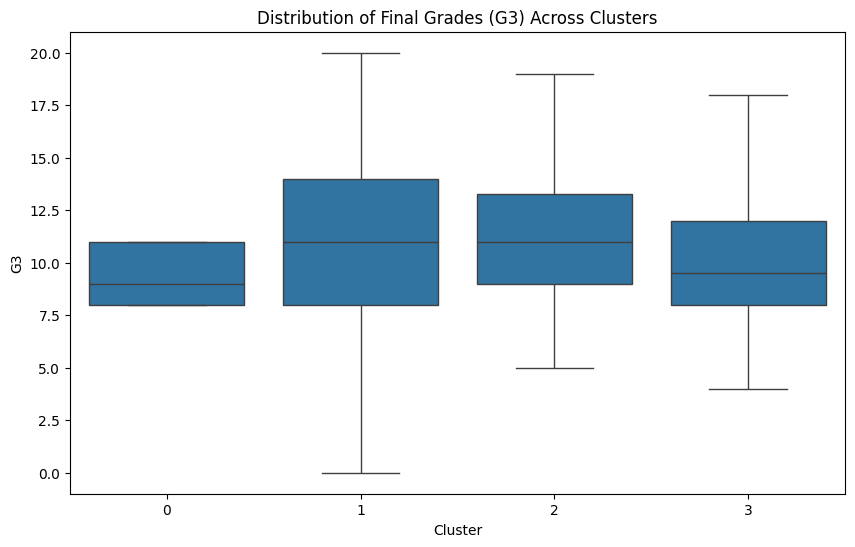

In [43]:
import seaborn as sns

# Example: Boxplot of G3 (final grades) across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='G3', data=dataset)
plt.title("Distribution of Final Grades (G3) Across Clusters")
plt.show()

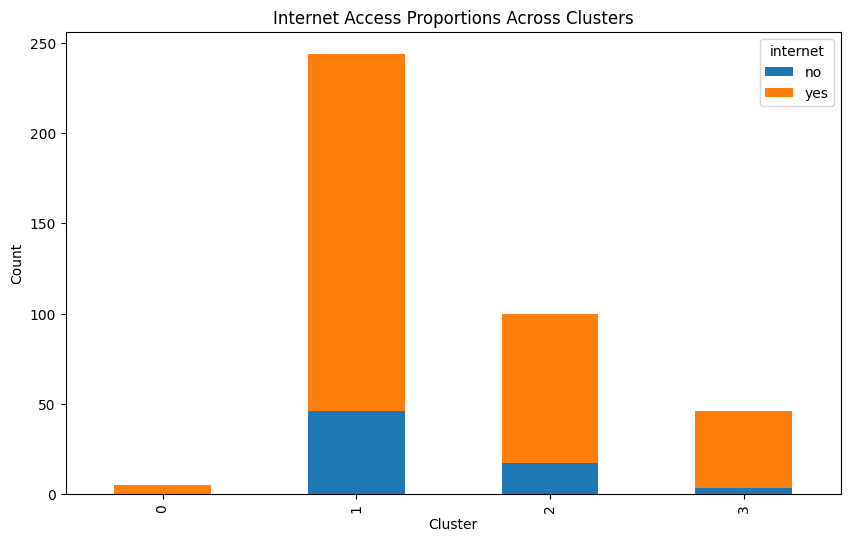

In [44]:
# Example: Proportion of 'internet' access in each cluster
internet_counts = dataset.groupby(['Cluster', 'internet']).size().unstack()
internet_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Internet Access Proportions Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [45]:
g3_means = dataset.groupby('Cluster')['G3'].mean()
print("Mean Final Grade (G3) per Cluster:")
print(g3_means)


Mean Final Grade (G3) per Cluster:
Cluster
0     9.400000
1    10.139344
2    11.340000
3     9.978261
Name: G3, dtype: float64


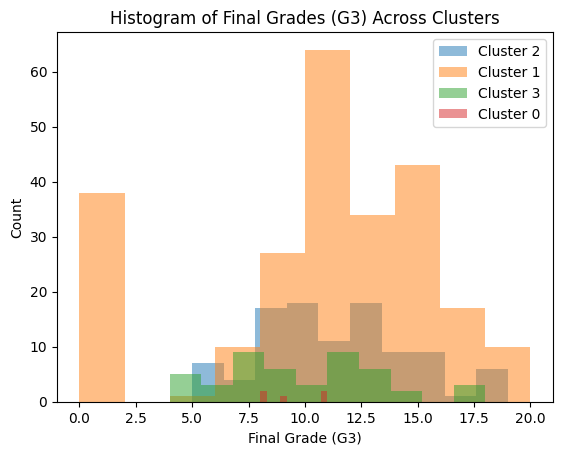

In [46]:
# Example: Histogram of G3 by cluster
for cluster in dataset['Cluster'].unique():
    cluster_data = dataset[dataset['Cluster'] == cluster]
    plt.hist(cluster_data['G3'], alpha=0.5, label=f'Cluster {cluster}')

plt.title("Histogram of Final Grades (G3) Across Clusters")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Count")
plt.legend()
plt.show()


### Some Observations
1. Clusters 1 and 2 have higher G3 averages than clusters 0 and 3.
2. All students from cluster 0 have internet access. Only a small portion of students from cluster 3 do not have internet access.
3. Students from clusters 1 and 2 have very few absences.
4. Jobs of parents from all clusters are mostly "services" or "others".